#CNN & APPLICATIONS - NGUYEN TRI CAO

In [5]:
import os
import random
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from torchsummary import summary

import matplotlib.pyplot as plt
from PIL import Image

In [6]:
SEED = 1

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

##**1. CNN**

###**1.1. Convolutional Layer**

**Example 1**

In [7]:
input = torch.randint(5, (1, 6, 6), dtype=torch.float32)
input

tensor([[[0., 4., 4., 3., 3., 3.],
         [1., 1., 4., 2., 3., 4.],
         [1., 3., 3., 0., 2., 1.],
         [2., 1., 0., 3., 1., 4.],
         [3., 1., 4., 2., 4., 4.],
         [3., 1., 2., 3., 2., 3.]]])

In [8]:
# define convolutional layer
conv_layer = nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=3, # create a kernel: 3 x 3
)

In [9]:
output = conv_layer(input)
output

tensor([[[-0.1371,  3.1811,  1.6137,  1.2504],
         [ 1.8862,  0.7669,  0.7485,  1.7254],
         [ 0.7941,  0.2194,  2.4803, -0.6855],
         [ 0.4021,  1.4944, -0.2216,  2.2299]]], grad_fn=<SqueezeBackward1>)

**Example 2**

In [10]:
input = torch.randint(5, (3, 6, 6), dtype=torch.float32)
input

tensor([[[3., 4., 1., 4., 4., 0.],
         [3., 0., 1., 3., 1., 4.],
         [2., 3., 1., 4., 4., 3.],
         [3., 3., 1., 2., 2., 3.],
         [4., 3., 0., 2., 2., 3.],
         [0., 4., 4., 0., 1., 2.]],

        [[2., 0., 0., 0., 4., 1.],
         [1., 4., 0., 3., 2., 2.],
         [3., 2., 2., 2., 2., 2.],
         [3., 3., 3., 1., 1., 1.],
         [0., 0., 2., 0., 3., 0.],
         [0., 4., 4., 2., 0., 0.]],

        [[3., 0., 2., 1., 4., 2.],
         [4., 4., 3., 4., 2., 1.],
         [4., 1., 3., 4., 3., 3.],
         [1., 2., 4., 4., 1., 2.],
         [2., 0., 0., 4., 3., 4.],
         [1., 0., 0., 4., 2., 1.]]])

In [11]:
# define convolutional layer
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=1,
    kernel_size=3, # create a kernel: 3 x 3
)

In [12]:
output = conv_layer(input)
output

tensor([[[-0.4354, -0.7663,  1.1675, -1.3796],
         [ 0.0743,  0.4605,  0.4782, -0.2870],
         [-0.5198, -0.4775,  1.6033, -0.4397],
         [ 0.7070, -1.0918, -0.2168,  0.3764]]], grad_fn=<SqueezeBackward1>)

**Example 3**

In [13]:
input

tensor([[[3., 4., 1., 4., 4., 0.],
         [3., 0., 1., 3., 1., 4.],
         [2., 3., 1., 4., 4., 3.],
         [3., 3., 1., 2., 2., 3.],
         [4., 3., 0., 2., 2., 3.],
         [0., 4., 4., 0., 1., 2.]],

        [[2., 0., 0., 0., 4., 1.],
         [1., 4., 0., 3., 2., 2.],
         [3., 2., 2., 2., 2., 2.],
         [3., 3., 3., 1., 1., 1.],
         [0., 0., 2., 0., 3., 0.],
         [0., 4., 4., 2., 0., 0.]],

        [[3., 0., 2., 1., 4., 2.],
         [4., 4., 3., 4., 2., 1.],
         [4., 1., 3., 4., 3., 3.],
         [1., 2., 4., 4., 1., 2.],
         [2., 0., 0., 4., 3., 4.],
         [1., 0., 0., 4., 2., 1.]]])

In [14]:
# define convolutional layer
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=1,
    kernel_size=3, # create a kernel: 3 x 3
    padding=1,
    stride=(2, 2)
)

In [15]:
output = conv_layer(input)
output

tensor([[[-1.4879,  0.5147,  0.6722],
         [-0.4065,  0.9736, -1.2475],
         [-1.6011, -0.3449, -0.9918]]], grad_fn=<SqueezeBackward1>)

###**1.2. Pooling Layer**

In [16]:
input = torch.randint(5, (1, 6, 6), dtype=torch.float32)
input

tensor([[[1., 3., 2., 1., 0., 2.],
         [3., 1., 1., 3., 2., 1.],
         [1., 1., 2., 4., 0., 0.],
         [2., 0., 1., 2., 0., 3.],
         [1., 3., 1., 1., 4., 4.],
         [2., 2., 3., 3., 0., 2.]]])

In [17]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

In [18]:
output = max_pool_layer(input)
output

tensor([[[3., 3., 2.],
         [2., 4., 3.],
         [3., 3., 4.]]])

In [19]:
avg_pool_layer = nn.AvgPool2d(
    kernel_size=(3, 2),
    stride=(2, 2)
)

In [20]:
output = avg_pool_layer(input)
output

tensor([[[1.6667, 2.1667, 0.8333],
         [1.3333, 1.8333, 1.8333]]])

###**1.3. Multiple Channels**

In [21]:
import torch
import torch.nn as nn

torch.manual_seed(42)

In [22]:
input = torch.randint(5, (3, 4, 4), dtype=torch.float32)
input

tensor([[[2., 2., 1., 4.],
         [1., 0., 0., 4.],
         [0., 3., 3., 4.],
         [0., 4., 1., 2.]],

        [[0., 0., 2., 1.],
         [4., 1., 3., 1.],
         [4., 3., 1., 4.],
         [2., 4., 2., 0.]],

        [[0., 4., 3., 4.],
         [4., 1., 2., 0.],
         [1., 2., 2., 4.],
         [2., 3., 3., 4.]]])

In [23]:
# define convolutional layer
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=1,
    kernel_size=3,
)

In [25]:
init_kernel_weight = torch.randint(
    high=2,
    size=(conv_layer.weight.data.shape),
    dtype=torch.float32
)
init_kernel_weight

tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [0., 1., 0.]],

         [[1., 1., 0.],
          [1., 0., 1.],
          [1., 0., 1.]],

         [[0., 1., 0.],
          [0., 1., 1.],
          [0., 1., 1.]]]])

In [26]:
# init weight
conv_layer.weight.data = init_kernel_weight
conv_layer.weight

Parameter containing:
tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [0., 1., 0.]],

         [[1., 1., 0.],
          [1., 0., 1.],
          [1., 0., 1.]],

         [[0., 1., 0.],
          [0., 1., 1.],
          [0., 1., 1.]]]], requires_grad=True)

In [27]:
# init bias
conv_layer.bias =  nn.Parameter(
    torch.tensor([1], dtype=torch.float32)
)
conv_layer.bias

Parameter containing:
tensor([1.], requires_grad=True)

In [28]:
output = conv_layer(input)
output

tensor([[[33., 37.],
         [37., 46.]]], grad_fn=<SqueezeBackward1>)

In [29]:
input = torch.randint(5, (1, 4, 4), dtype=torch.float32)
input

tensor([[[2., 3., 1., 0.],
         [1., 3., 1., 3.],
         [0., 1., 4., 0.],
         [0., 4., 0., 2.]]])

In [30]:
# define convolutional layer
conv_layer = nn.Conv2d(
    in_channels=1,
    out_channels=2,
    kernel_size=3,
)

In [31]:
init_kernel_weight = torch.randint(
    high=2,
    size=(conv_layer.weight.data.shape),
    dtype=torch.float32
)
init_kernel_weight

tensor([[[[1., 0., 0.],
          [1., 1., 0.],
          [0., 1., 1.]]],


        [[[1., 0., 0.],
          [0., 0., 0.],
          [0., 1., 0.]]]])

In [32]:
# init weight
conv_layer.weight.data = init_kernel_weight
conv_layer.weight

Parameter containing:
tensor([[[[1., 0., 0.],
          [1., 1., 0.],
          [0., 1., 1.]]],


        [[[1., 0., 0.],
          [0., 0., 0.],
          [0., 1., 0.]]]], requires_grad=True)

In [33]:
# init bias
conv_layer.bias =  nn.Parameter(
    torch.tensor([1, 1], dtype=torch.float32)
)
conv_layer.bias

Parameter containing:
tensor([1., 1.], requires_grad=True)

In [34]:
output = conv_layer(input)
output

tensor([[[12., 12.],
         [ 7., 11.]],

        [[ 4.,  8.],
         [ 6.,  4.]]], grad_fn=<SqueezeBackward1>)

In [35]:
import torch
import torch.nn as nn

torch.manual_seed(42)

In [42]:
input = torch.randint(5, (1, 4, 4), dtype=torch.float32)
input

tensor([[[0., 3., 2., 2.],
         [0., 4., 1., 0.],
         [1., 4., 1., 4.],
         [0., 3., 2., 0.]]])

In [43]:
init_kernel_weight = torch.randint(
    high=2,
    size=(conv_layer.weight.data.shape),
    dtype=torch.float32
)
init_kernel_weight

tensor([[[[1., 1., 1.],
          [1., 1., 0.],
          [1., 0., 1.]]],


        [[[1., 0., 1.],
          [0., 1., 1.],
          [0., 1., 0.]]]])

In [44]:
# define convolutional layer
conv_layer = nn.Conv2d(
    in_channels=2,
    out_channels=2,
    kernel_size=3,
)

In [45]:
# init weight
conv_layer.weight.data = init_kernel_weight
conv_layer.weight

Parameter containing:
tensor([[[[1., 1., 1.],
          [1., 1., 0.],
          [1., 0., 1.]]],


        [[[1., 0., 1.],
          [0., 1., 1.],
          [0., 1., 0.]]]], requires_grad=True)

In [46]:
# init bias
conv_layer.bias =  nn.Parameter(
    torch.tensor([1, 1], dtype=torch.float32)
)
conv_layer.bias

Parameter containing:
tensor([1., 1.], requires_grad=True)

In [47]:
output = conv_layer(input)
output

tensor([[[12., 21.],
         [13., 14.]],

        [[12.,  8.],
         [10., 12.]]], grad_fn=<SqueezeBackward1>)

##**2. CNN for Image Classification**

###**2.1. MNIST Dataset**

####**2.1.1. Load Dataset**

In [49]:
ROOT = './data'

train_data = datasets.MNIST(
    root=ROOT,
    train=True,
    download=True
)

test_data = datasets.MNIST(
    root=ROOT,
    train=False,
    download=True
    )

In [50]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [51]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [52]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [53]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [54]:
train_data.targets.shape

torch.Size([60000])

In [55]:
test_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [56]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [57]:
# plot images
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i], cmap='bone')
        ax.axis('off')

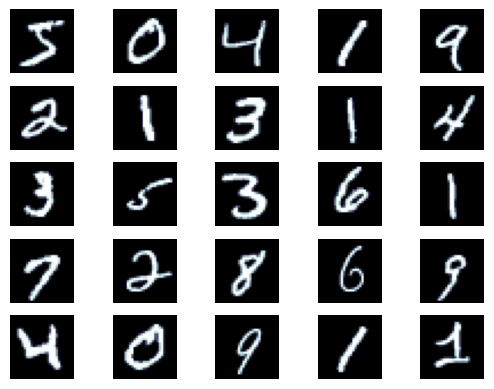

In [58]:
N_IMAGES = 25

images = [image for image, label in [train_data[i] for i in range(N_IMAGES)]]

plot_images(images)

####**2.1.2. Preprocessing**

**Train: Valid = 0.9 : 0.1**

In [59]:
VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

In [60]:
train_data, valid_data = data.random_split(
    train_data,
    [n_train_examples, n_valid_examples]
)

In [61]:
len(train_data)

54000

In [62]:
len(valid_data)

6000

**Preprocessing with `transforms`**

- Normalization (mean, sdt)
- Convert to tensor

In [63]:
# compute mean and std
mean = train_data.dataset.data.float().mean() / 255
std = train_data.dataset.data.float().std() / 255
mean, std

(tensor(0.1307), tensor(0.3081))

In [64]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean], std=[std])
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean], std=[std])
])

In [65]:
train_data.dataset.transform = train_transforms
valid_data.dataset.transform = test_transforms

####**2.1.3. Dataloader**

In [66]:
BATCH_SIZE = 256

train_dataloader = data.DataLoader(
    train_data,
    shuffle=True,
    batch_size=BATCH_SIZE
)

valid_dataloader = data.DataLoader(
    valid_data,
    batch_size=BATCH_SIZE
)

In [67]:
len(train_dataloader)

211

In [68]:
next(iter(train_dataloader))[0].shape

torch.Size([256, 1, 28, 28])

In [69]:
inputs, labels = next(iter(train_dataloader))

####**2.1.4. Model**

In [70]:
class LeNetClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding='same')
        self.avgpool1 = nn.AvgPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.avgpool2 = nn.AvgPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc_1 = nn.Linear(16 * 5 * 5, 120)
        self.fc_2 = nn.Linear(120, 84)
        self.fc_3 = nn.Linear(84, num_classes)

    def forward(self, inputs):
        outputs = self.conv1(inputs)
        outputs = self.avgpool1(outputs)
        outputs = F.relu(outputs)
        outputs = self.conv2(outputs)
        outputs = self.avgpool2(outputs)
        outputs = F.relu(outputs)
        outputs = self.flatten(outputs)
        outputs = self.fc_1(outputs)
        outputs = self.fc_2(outputs)
        outputs = self.fc_3(outputs)
        return outputs

In [71]:
num_classes = len(train_data.dataset.classes)
num_classes

10

In [72]:
lenet_model = LeNetClassifier(10)

In [73]:
lenet_model

LeNetClassifier(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (avgpool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (avgpool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_1): Linear(in_features=400, out_features=120, bias=True)
  (fc_2): Linear(in_features=120, out_features=84, bias=True)
  (fc_3): Linear(in_features=84, out_features=10, bias=True)
)

In [74]:
summary(lenet_model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         AvgPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         AvgPool2d-4             [-1, 16, 5, 5]               0
           Flatten-5                  [-1, 400]               0
            Linear-6                  [-1, 120]          48,120
            Linear-7                   [-1, 84]          10,164
            Linear-8                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
----------------------------------------------------------------


In [75]:
predictions = lenet_model(inputs)

In [76]:
predictions.shape

torch.Size([256, 10])

####**2.1.5. Loss & Optimizer**

In [77]:
optimizer = optim.Adam(lenet_model.parameters())

In [78]:
criterion = nn.CrossEntropyLoss()

In [79]:
loss = criterion(predictions, labels)
loss

tensor(2.3083, grad_fn=<NllLossBackward0>)

In [80]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [81]:
lenet_model.to(device)

LeNetClassifier(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (avgpool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (avgpool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_1): Linear(in_features=400, out_features=120, bias=True)
  (fc_2): Linear(in_features=120, out_features=84, bias=True)
  (fc_3): Linear(in_features=84, out_features=10, bias=True)
)

####**2.1.6. Trainer**

In [82]:
import time

def train(model, optimizer, criterion, train_dataloader, device, epoch=0, log_interval=50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()

    for idx, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        predictions = model(inputs)

        # compute loss
        loss = criterion(predictions, labels)
        losses.append(loss.item())

        # backward
        loss.backward()
        optimizer.step()
        total_acc += (predictions.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(train_dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [83]:
train_acc, train_loss = train(lenet_model, optimizer, criterion, train_dataloader, device)

| epoch   0 |    50/  211 batches | accuracy    0.656
| epoch   0 |   100/  211 batches | accuracy    0.888
| epoch   0 |   150/  211 batches | accuracy    0.920
| epoch   0 |   200/  211 batches | accuracy    0.939


In [84]:
train_acc, train_loss

(0.9469339622641509, 0.4915543168218215)

In [85]:
def evaluate(model, criterion, valid_dataloader):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []

    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(valid_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            predictions = model(inputs)

            loss = criterion(predictions, labels)
            losses.append(loss.item())

            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [86]:
eval_acc, eval_loss = evaluate(lenet_model, criterion, valid_dataloader)

In [87]:
eval_acc, eval_loss

(0.9485, 0.17025818986197314)

####**2.1.7. Training**

In [90]:
num_classes = len(train_data.dataset.classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

lenet_model = LeNetClassifier(num_classes)
lenet_model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(lenet_model.parameters())

num_epochs = 10
save_model = './model'

train_accs, train_losses = [], []
eval_accs, eval_losses = [], []
best_loss_eval = 100

for epoch in range(1, num_epochs+1):
    epoch_start_time = time.time()
    # Training
    train_acc, train_loss = train(lenet_model, optimizer, criterion, train_dataloader, device, epoch)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Evaluation
    eval_acc, eval_loss = evaluate(lenet_model, criterion, valid_dataloader)
    eval_accs.append(eval_acc)
    eval_losses.append(eval_loss)

    # Save best model
    if eval_loss < best_loss_eval:
        torch.save(lenet_model.state_dict(), save_model + '/lenet_model.pt')

    # Print loss, acc end epoch
    print("-" * 59)
    print(
        "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
        "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
            epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
        )
    )
    print("-" * 59)

    # Load best model
    lenet_model.load_state_dict(torch.load(save_model + '/lenet_model.pt'))
    lenet_model.eval()

| epoch   1 |    50/  211 batches | accuracy    0.690
| epoch   1 |   100/  211 batches | accuracy    0.880
| epoch   1 |   150/  211 batches | accuracy    0.907
| epoch   1 |   200/  211 batches | accuracy    0.927
-----------------------------------------------------------
| End of epoch   1 | Time: 32.04s | Train Accuracy    0.940 | Train Loss    0.501 | Valid Accuracy    0.944 | Valid Loss    0.197 
-----------------------------------------------------------
| epoch   2 |    50/  211 batches | accuracy    0.946
| epoch   2 |   100/  211 batches | accuracy    0.954
| epoch   2 |   150/  211 batches | accuracy    0.960
| epoch   2 |   200/  211 batches | accuracy    0.964
-----------------------------------------------------------
| End of epoch   2 | Time: 31.65s | Train Accuracy    0.965 | Train Loss    0.147 | Valid Accuracy    0.966 | Valid Loss    0.112 
-----------------------------------------------------------
| epoch   3 |    50/  211 batches | accuracy    0.968
| epoch   3 

In [92]:
eval_acc, eval_loss = evaluate(lenet_model, criterion, valid_dataloader)
eval_acc, eval_loss

(0.9816666666666667, 0.06148487601118783)

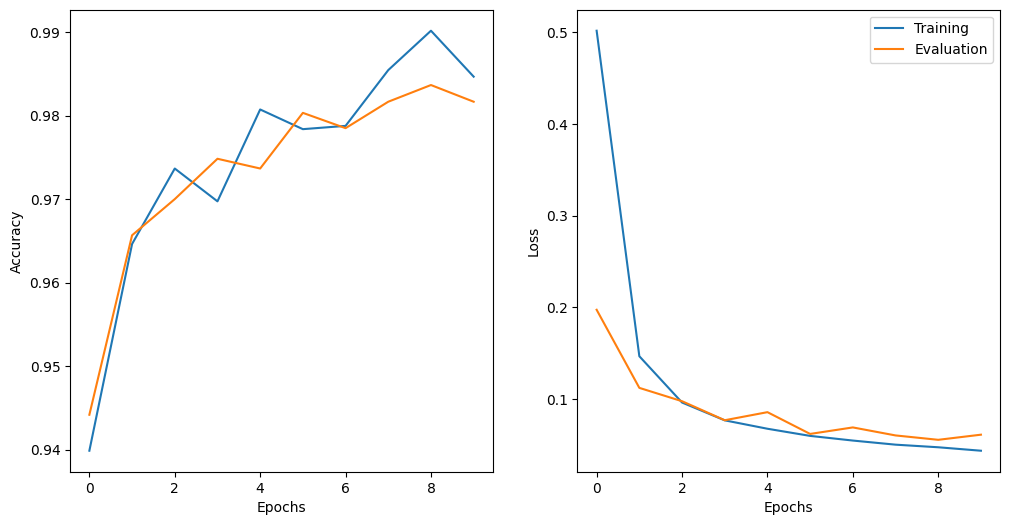

In [93]:
def plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses):
    epochs = list(range(num_epochs))
    fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
    axs[0].plot(epochs, train_accs, label = "Training")
    axs[0].plot(epochs, eval_accs, label = "Evaluation")
    axs[1].plot(epochs, train_losses, label = "Training")
    axs[1].plot(epochs, eval_losses, label = "Evaluation")
    axs[0].set_xlabel("Epochs")
    axs[1].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_ylabel("Loss")
    plt.legend()

plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses)

####**2.1.8. Evaluation & Prediction**

In [94]:
test_data.transform = test_transforms

In [95]:
test_dataloader = data.DataLoader(
    test_data,
    batch_size=BATCH_SIZE
)

In [96]:
test_acc, test_loss = evaluate(lenet_model, criterion, test_dataloader)
test_acc, test_loss

(0.9841, 0.04760853136976948)

In [97]:
def plot_filtered_images(images, filters):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(20, 10))

    for i in range(n_images):

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(images[i].squeeze(0), cmap='bone')
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]
            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

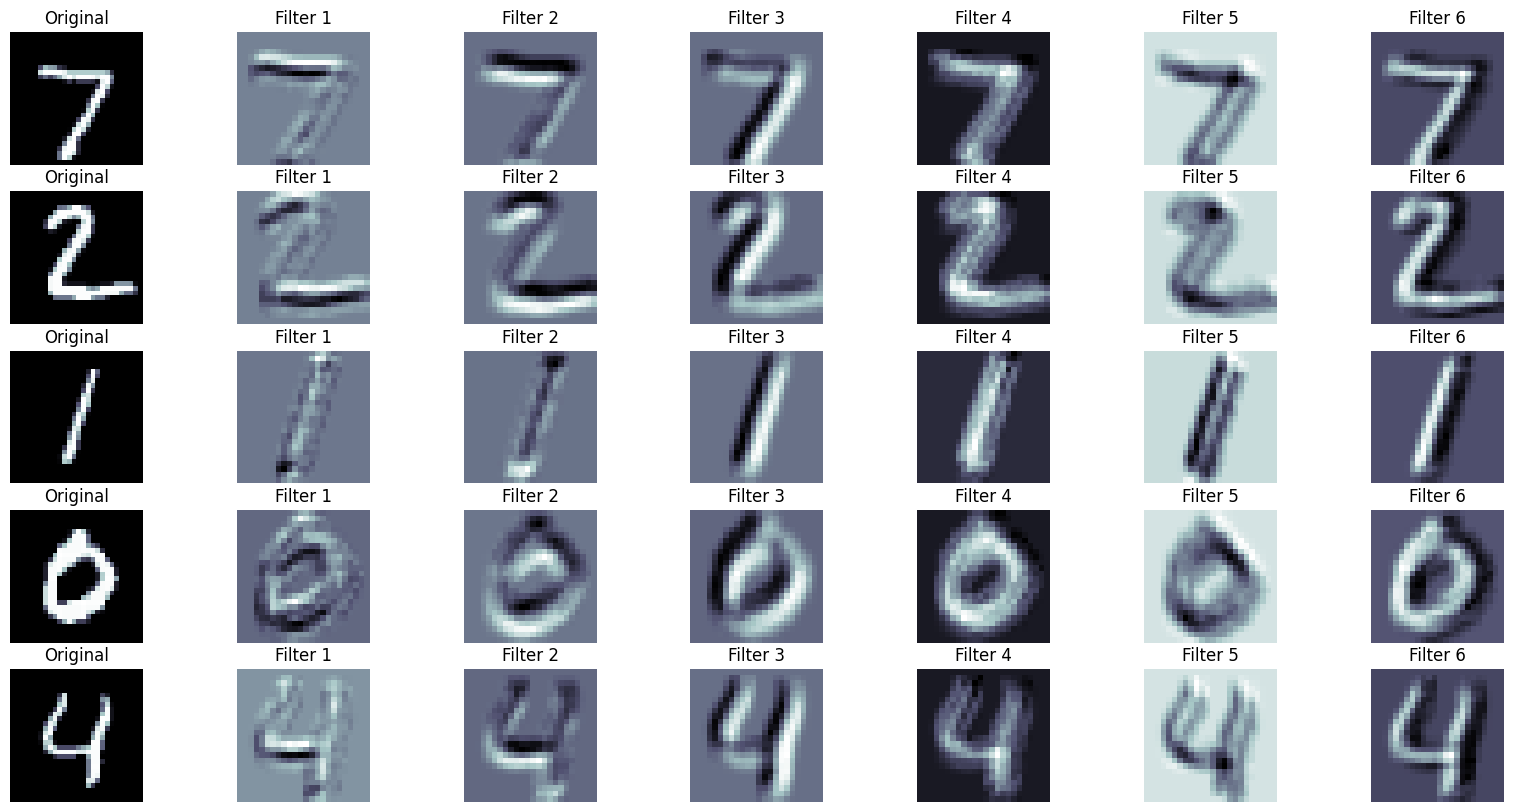

In [98]:
N_IMAGES = 5

images = [image for image, label in [test_data[i] for i in range(N_IMAGES)]]
filters = lenet_model.conv1.weight.data

plot_filtered_images(images, filters)

###**2.2. Cassava Leaf Disease**

####**2.2.1. Load Dataset**

**Download Dataset**

In [99]:
!wget --no-check-certificate https://storage.googleapis.com/emcassavadata/cassavaleafdata.zip \
                -O /content/cassavaleafdata.zip

--2023-11-13 16:32:52--  https://storage.googleapis.com/emcassavadata/cassavaleafdata.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.207, 74.125.139.207, 173.194.210.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1354096203 (1.3G) [application/octet-stream]
Saving to: ‘/content/cassavaleafdata.zip’

/content/cassavalea 100%[===================>]   1.26G  52.5MB/s    in 16s     

2023-11-13 16:33:08 (79.7 MB/s) - ‘/content/cassavaleafdata.zip’ saved [1354096203/1354096203]



In [100]:
!unzip /content/cassavaleafdata.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: cassavaleafdata/train/cgm/train-cgm-679.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-68.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-680.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-681.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-682.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-683.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-684.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-685.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-686.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-687.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-688.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-689.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-69.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-690.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-691.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-692.jpg  
 

**Read Dataset**

In [101]:
%cd /content/cassavaleafdata

/content/cassavaleafdata


In [102]:
data_paths = {
    'train': './train',
    'valid': './validation',
    'test': './test'
}

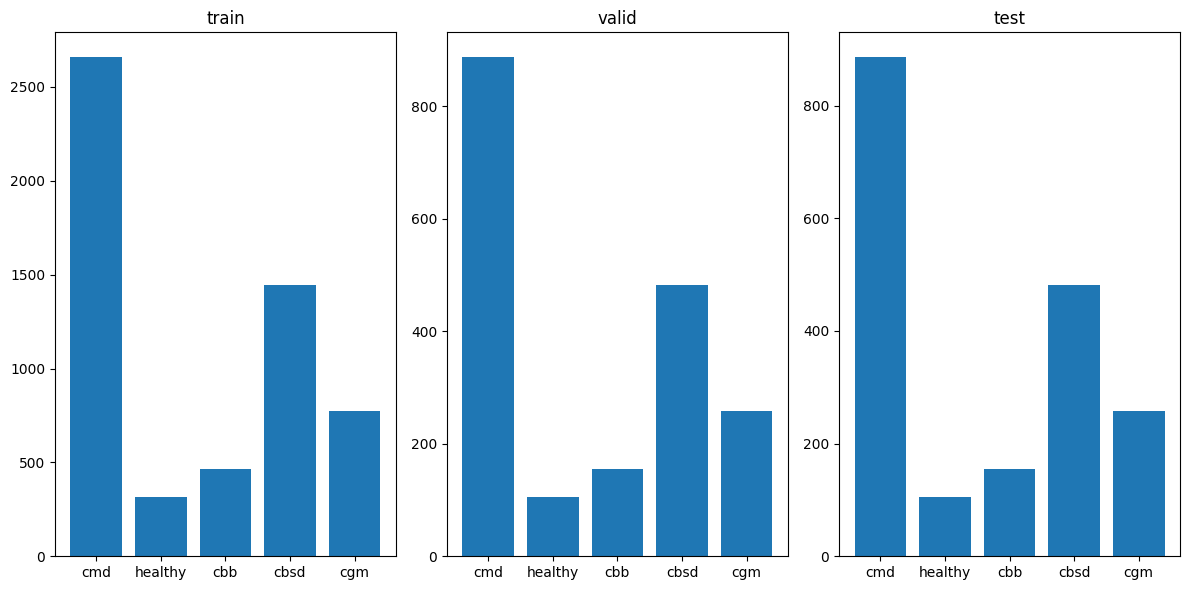

In [103]:
from imutils import paths
def show_labels(data_paths):
    fig, ax = plt.subplots(1, len(data_paths), figsize=(12,6))
    for idx, (key, sub_dir) in enumerate(data_paths.items()):
        labels = os.listdir(sub_dir)
        list_data = []
        for label in labels:
            image_files = list(paths.list_images(os.path.join(sub_dir, label)))
            list_data.append(len(image_files))
        ax[idx].bar(labels, list_data)
        ax[idx].set_title(key)
    plt.tight_layout()
    plt.show()

show_labels(data_paths)

In [104]:
labels_dict = {
    "cbb": "Cassava Bacterial Blight (CBB)",
    "cbsd": "Cassava Brown Streak Disease (CBSD)",
    "cgm": "Cassava Green Mottle (CGM)",
    "cmd": "Cassava Mosaic Disease (CMD)",
    "healthy": "Healthy"
}

In [105]:
def plot_images(data_dir, label, num_sample=6):
    data_dir = os.path.join(data_dir, label)
    image_files = list(paths.list_images(data_dir))[:num_sample]
    fig, ax = plt.subplots(2,num_sample//2, figsize=(14,7))
    for i, image_dir in enumerate(image_files):
        img = Image.open(image_dir)
        label = image_dir.split('/')[-2]
        ax[i//(num_sample//2)][i%(num_sample//2)].imshow(img)
        ax[i//(num_sample//2)][i%(num_sample//2)].set_title(labels_dict[label])
        ax[i//(num_sample//2)][i%(num_sample//2)].axis('off')
    plt.tight_layout()
    plt.show()

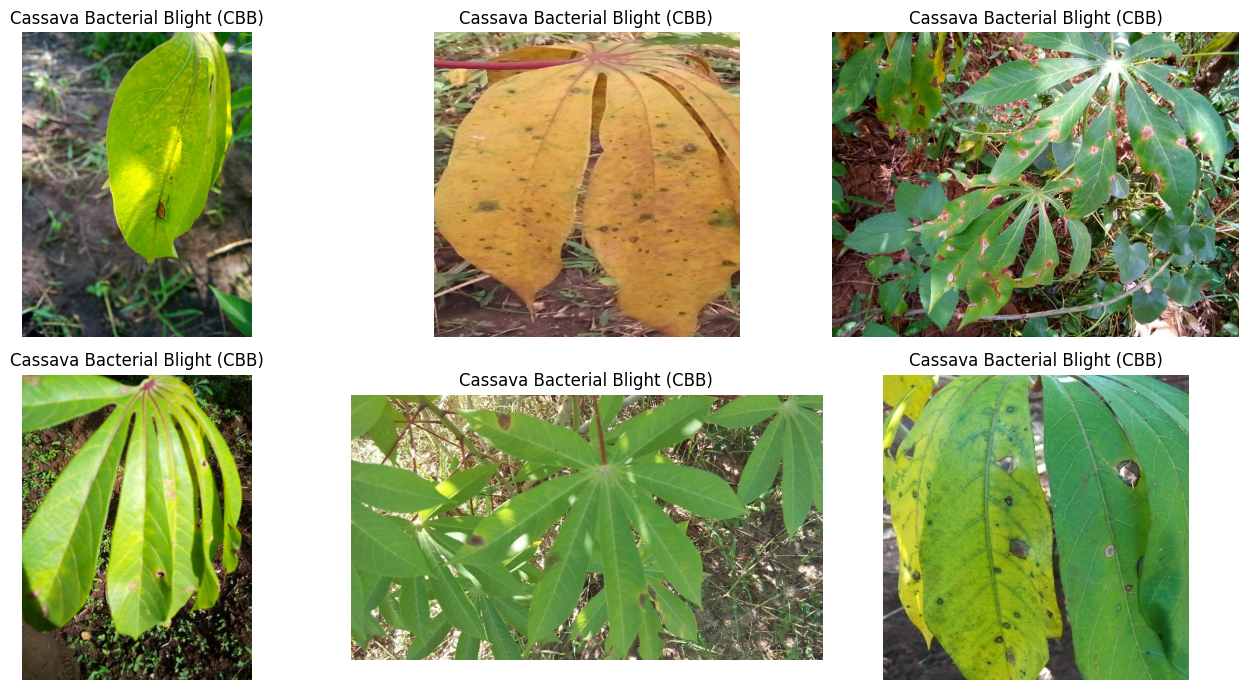

In [106]:
plot_images(data_paths['train'], label="cbb")

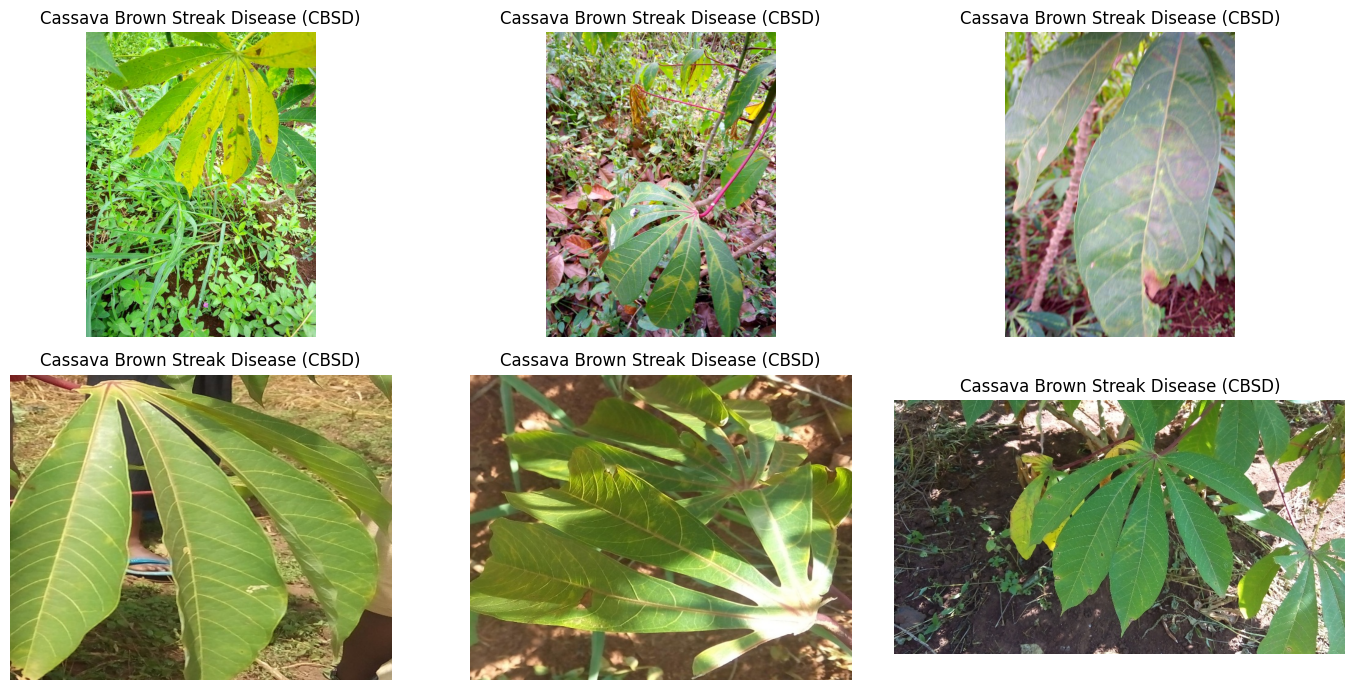

In [107]:
plot_images(data_paths['train'], label="cbsd")

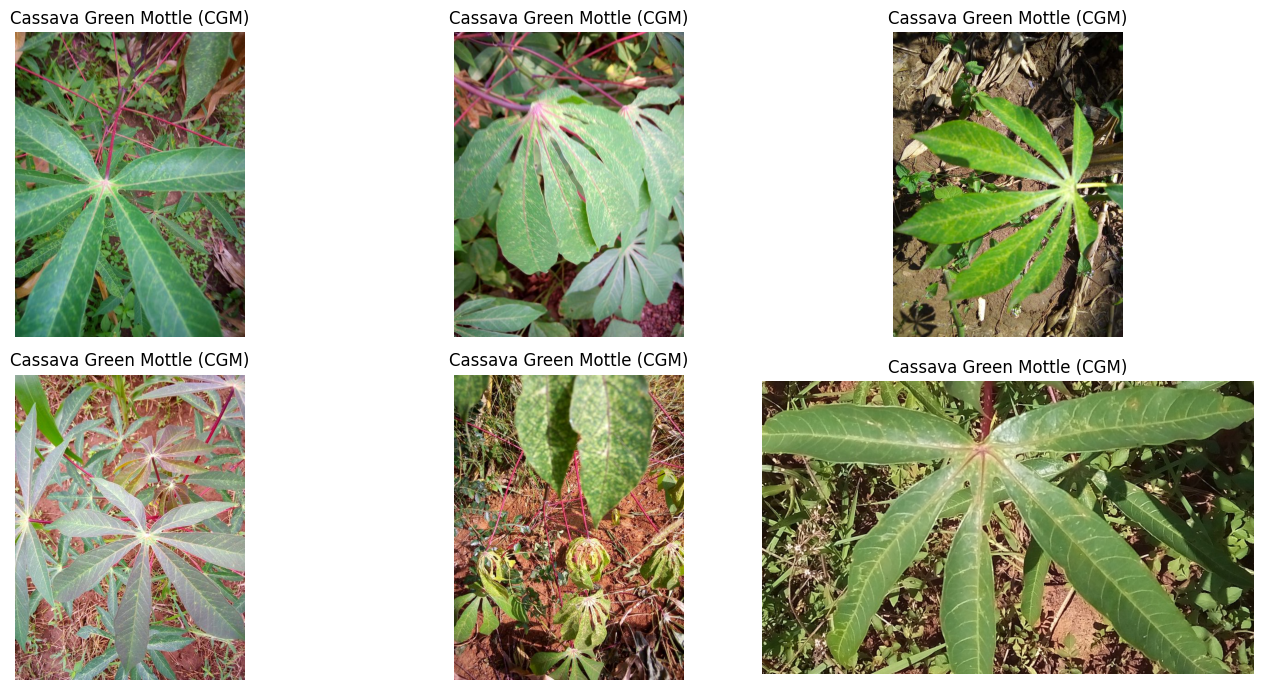

In [108]:
plot_images(data_paths['train'], label="cgm")

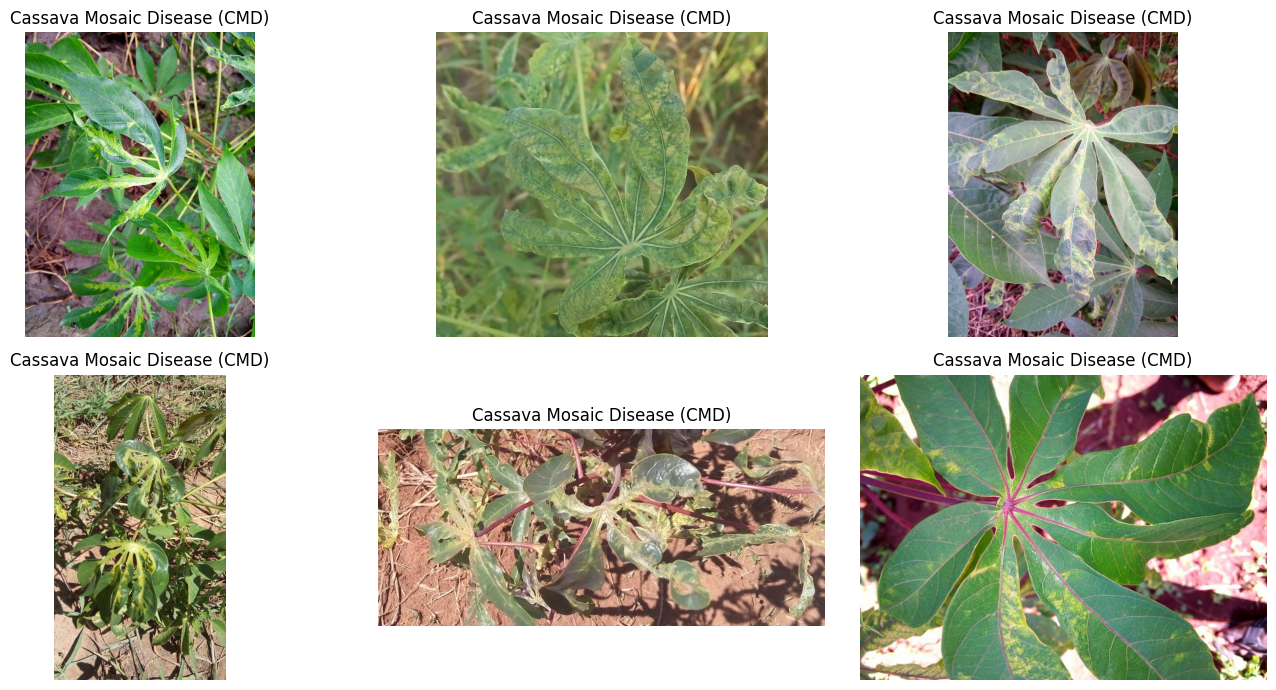

In [109]:
plot_images(data_paths['train'], label="cmd")

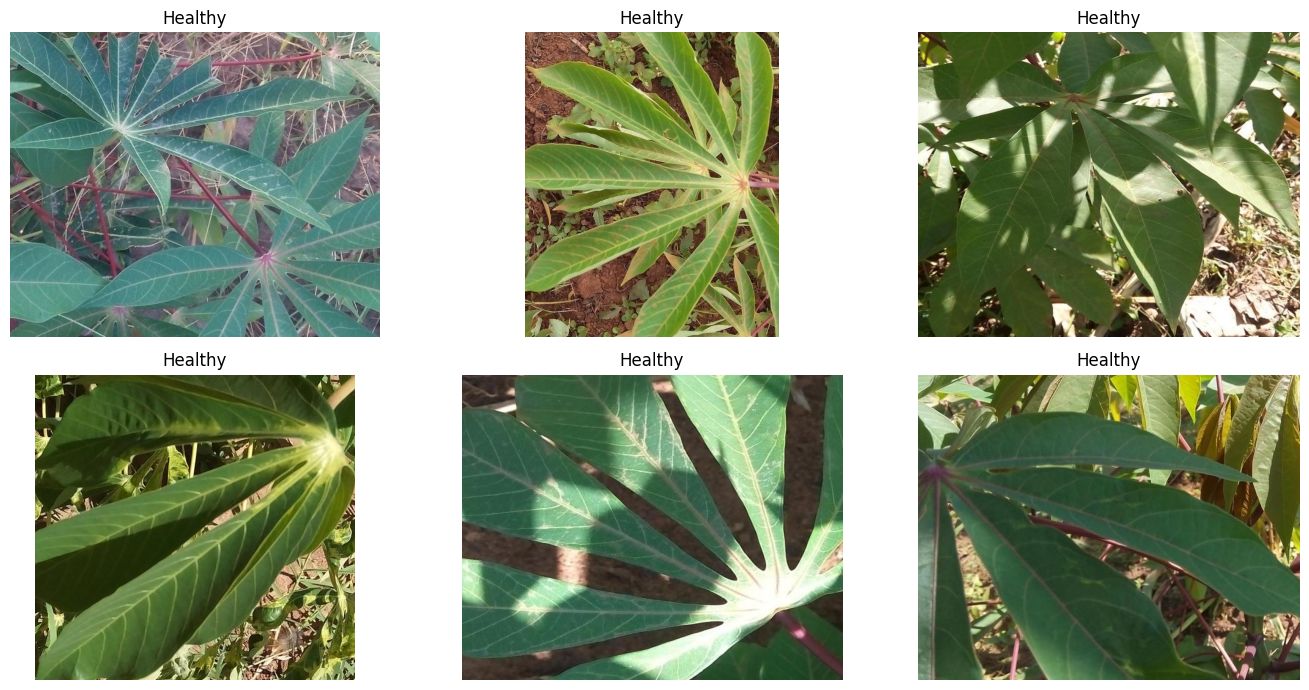

In [110]:
plot_images(data_paths['train'], label="healthy")

####**2.2.2. Preprocessing**

In [111]:
# load image from path
def loader(path):
    return Image.open(path)

In [112]:
img_size = 150

train_transforms = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

In [113]:
train_data = datasets.ImageFolder(
    root=data_paths['train'],
    loader=loader,
    transform=train_transforms
)
valid_data = datasets.ImageFolder(
    root=data_paths['valid'],
    transform=train_transforms
)
test_data = datasets.ImageFolder(
    root=data_paths['test'],
    transform=train_transforms
)

####**2.2.3. Dataloader**

In [114]:
BATCH_SIZE = 512

train_dataloader = data.DataLoader(
    train_data,
    shuffle=True,
    batch_size=BATCH_SIZE
)
valid_dataloader = data.DataLoader(
    valid_data,
    batch_size=BATCH_SIZE
)
test_dataloader = data.DataLoader(
    test_data,
    batch_size=BATCH_SIZE
)

In [115]:
len(train_dataloader)

12

In [116]:
inputs, labels = next(iter(train_dataloader))

####**2.2.4. Model**

In [117]:
class LeNetClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=3, out_channels=6, kernel_size=5, padding='same'
        )
        self.avgpool1 = nn.AvgPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.avgpool2 = nn.AvgPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc_1 = nn.Linear(16 * 35 * 35, 120)
        self.fc_2 = nn.Linear(120, 84)
        self.fc_3 = nn.Linear(84, num_classes)

    def forward(self, inputs):
        outputs = self.conv1(inputs)
        outputs = self.avgpool1(outputs)
        outputs = F.relu(outputs)
        outputs = self.conv2(outputs)
        outputs = self.avgpool2(outputs)
        outputs = F.relu(outputs)
        outputs = self.flatten(outputs)
        outputs = self.fc_1(outputs)
        outputs = self.fc_2(outputs)
        outputs = self.fc_3(outputs)
        return outputs

In [118]:
num_classes = len(train_data.classes)
num_classes

5

In [119]:
lenet_model = LeNetClassifier(num_classes)

In [120]:
summary(lenet_model, (3, 150, 150))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 6, 150, 150]             456
         AvgPool2d-2            [-1, 6, 75, 75]               0
            Conv2d-3           [-1, 16, 71, 71]           2,416
         AvgPool2d-4           [-1, 16, 35, 35]               0
           Flatten-5                [-1, 19600]               0
            Linear-6                  [-1, 120]       2,352,120
            Linear-7                   [-1, 84]          10,164
            Linear-8                    [-1, 5]             425
Total params: 2,365,581
Trainable params: 2,365,581
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.26
Forward/backward pass size (MB): 2.20
Params size (MB): 9.02
Estimated Total Size (MB): 11.48
----------------------------------------------------------------


In [121]:
predictions = lenet_model(inputs)

In [122]:
predictions

tensor([[-0.1858,  0.1473,  0.0256, -0.0496, -0.0826],
        [-0.1717,  0.1562,  0.0197, -0.0652, -0.0759],
        [-0.1608,  0.1437,  0.0350, -0.0548, -0.0894],
        ...,
        [-0.1715,  0.1463,  0.0320, -0.0620, -0.0763],
        [-0.1621,  0.1467,  0.0351, -0.0543, -0.0854],
        [-0.1675,  0.1545,  0.0317, -0.0512, -0.0824]],
       grad_fn=<AddmmBackward0>)

####**2.2.5. Loss & Optimizer**

In [123]:
optimizer = optim.Adam(lenet_model.parameters())

In [124]:
criterion = nn.CrossEntropyLoss()

In [125]:
loss = criterion(predictions, labels)
loss

tensor(1.5907, grad_fn=<NllLossBackward0>)

In [126]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [127]:
lenet_model.to(device)

LeNetClassifier(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (avgpool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (avgpool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_1): Linear(in_features=19600, out_features=120, bias=True)
  (fc_2): Linear(in_features=120, out_features=84, bias=True)
  (fc_3): Linear(in_features=84, out_features=5, bias=True)
)

####**2.2.6. Trainer**

In [128]:
import time

def train(model, optimizer, criterion, train_dataloader, device, epoch=0, log_interval=15):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()

    for idx, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        predictions = model(inputs)

        # compute loss
        loss = criterion(predictions, labels)
        losses.append(loss.item())

        # backward
        loss.backward()
        optimizer.step()
        total_acc += (predictions.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(train_dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [129]:
train_acc, train_loss = train(lenet_model, optimizer, criterion, train_dataloader, device)

In [130]:
train_acc, train_loss

(0.39674681753889673, 1.463326205809911)

In [131]:
def evaluate(model, criterion, valid_dataloader):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []

    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(valid_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            predictions = model(inputs)

            loss = criterion(predictions, labels)
            losses.append(loss.item())

            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [132]:
eval_acc, eval_loss = evaluate(lenet_model, criterion, valid_dataloader)

In [133]:
eval_acc, eval_loss

(0.4695606140815246, 1.3524059504270554)

####**2.2.7. Training**

In [137]:
num_classes = len(train_data.classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

lenet_model = LeNetClassifier(num_classes)
lenet_model.to(device)

criterion = torch.nn.CrossEntropyLoss()
learning_rate = 2e-4
optimizer = optim.Adam(lenet_model.parameters(), learning_rate)

num_epochs = 10

train_accs, train_losses = [], []
eval_accs, eval_losses = [], []
best_loss_eval = 100

for epoch in range(1, num_epochs+1):
    epoch_start_time = time.time()
    # Training
    train_acc, train_loss = train(lenet_model, optimizer, criterion, train_dataloader, device, epoch, log_interval=10)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Evaluation
    eval_acc, eval_loss = evaluate(lenet_model, criterion, valid_dataloader)
    eval_accs.append(eval_acc)
    eval_losses.append(eval_loss)

    # Save best model
    if eval_loss < best_loss_eval:
        torch.save(lenet_model.state_dict(),'/lenet_model.pt')

    # Print loss, acc end epoch
    print("-" * 59)
    print(
        "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
        "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
            epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
        )
    )
    print("-" * 59)

    # Load best model
    lenet_model.load_state_dict(torch.load('/lenet_model.pt'))
    lenet_model.eval()

| epoch   1 |    10/   12 batches | accuracy    0.470
-----------------------------------------------------------
| End of epoch   1 | Time: 122.75s | Train Accuracy    0.542 | Train Loss    1.414 | Valid Accuracy    0.470 | Valid Loss    1.354 
-----------------------------------------------------------
| epoch   2 |    10/   12 batches | accuracy    0.470
-----------------------------------------------------------
| End of epoch   2 | Time: 121.56s | Train Accuracy    0.500 | Train Loss    1.347 | Valid Accuracy    0.470 | Valid Loss    1.337 
-----------------------------------------------------------
| epoch   3 |    10/   12 batches | accuracy    0.471
-----------------------------------------------------------
| End of epoch   3 | Time: 125.96s | Train Accuracy    0.250 | Train Loss    1.341 | Valid Accuracy    0.480 | Valid Loss    1.322 
-----------------------------------------------------------
| epoch   4 |    10/   12 batches | accuracy    0.488
----------------------------

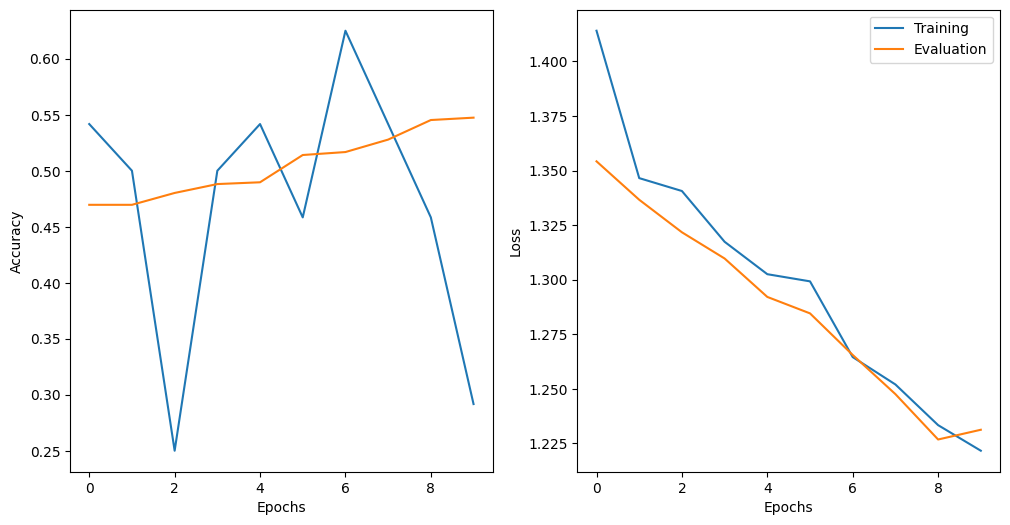

In [139]:
def plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses):
    epochs = list(range(num_epochs))
    fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
    axs[0].plot(epochs, train_accs, label = "Training")
    axs[0].plot(epochs, eval_accs, label = "Evaluation")
    axs[1].plot(epochs, train_losses, label = "Training")
    axs[1].plot(epochs, eval_losses, label = "Evaluation")
    axs[0].set_xlabel("Epochs")
    axs[1].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_ylabel("Loss")
    plt.legend()

plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses)

####**2.2.8. Evaluation & Prediction**

In [140]:
test_acc, test_loss = evaluate(lenet_model, criterion, test_dataloader)
test_acc, test_loss

(0.5586206896551724, 1.210728019475937)

##**3. CNN for Text Classification**

###**3.1. Load dataset**

In [141]:
!git clone https://github.com/congnghia0609/ntc-scv.git

Cloning into 'ntc-scv'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 39 (delta 0), reused 4 (delta 0), pack-reused 35
Receiving objects: 100% (39/39), 186.94 MiB | 30.04 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (11/11), done.


In [142]:
!unzip ./ntc-scv/data/data_test.zip -d ./data
!unzip ./ntc-scv/data/data_train.zip -d ./data
!rm -rf ./ntc-scv

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: ./data/data_train/train/pos/31228.txt  
  inflating: ./data/data_train/train/pos/3123.txt  
  inflating: ./data/data_train/train/pos/31232.txt  
  inflating: ./data/data_train/train/pos/31233.txt  
  inflating: ./data/data_train/train/pos/31234.txt  
  inflating: ./data/data_train/train/pos/31236.txt  
  inflating: ./data/data_train/train/pos/31238.txt  
  inflating: ./data/data_train/train/pos/31240.txt  
  inflating: ./data/data_train/train/pos/31242.txt  
  inflating: ./data/data_train/train/pos/31247.txt  
  inflating: ./data/data_train/train/pos/31250.txt  
  inflating: ./data/data_train/train/pos/31251.txt  
  inflating: ./data/data_train/train/pos/31252.txt  
  inflating: ./data/data_train/train/pos/31257.txt  
  inflating: ./data/data_train/train/pos/31260.txt  
  inflating: ./data/data_train/train/pos/31261.txt  
  inflating: ./data/data_train/train/pos/31262.txt  
  inflating: ./data/data_train/train/pos/31

In [143]:
import os
import pandas as pd

def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding="utf-8") as f:
                lines = f.readlines()
            sentence = " ".join(lines)
            if label == "neg":
                label = 0
            if label == "pos":
                label = 1
            data = {
                'sentence': sentence,
                'label': label
            }
            examples.append(data)
    return pd.DataFrame(examples)

In [144]:
folder_paths = {
    'train': './data/data_train/train',
    'valid': './data/data_train/test',
    'test': './data/data_test/test'
}

train_df = load_data_from_path(folder_paths['train'])
valid_df = load_data_from_path(folder_paths['valid'])
test_df = load_data_from_path(folder_paths['test'])

###**3.2. Preprocessing**

In [145]:
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=eb6a9dc004d4c8a731810fe4a6a3779bd72ca771f93fa78ef1fd1e119a896275
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [146]:
from langid.langid import LanguageIdentifier, model

def identify_vn(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    not_vi_idx = set()
    THRESHOLD = 0.9
    for idx, row in df.iterrows():
        score = identifier.classify(row["sentence"])
        if score[0] != "vi" or (score[0] == "vi" and score[1] <= THRESHOLD):
            not_vi_idx.add(idx)
    vi_df = df[~df.index.isin(not_vi_idx)]
    not_vi_df = df[df.index.isin(not_vi_idx)]
    return vi_df, not_vi_df

In [147]:
train_df_vi, train_df_other = identify_vn(train_df)

In [148]:
import re
import string

def preprocess_text(text):
    # remove URLs https://www.
    url_pattern = re.compile(r'https?://\s+\wwww\.\s+')
    text = url_pattern.sub(r" ", text)

    # remove HTML Tags: <>
    html_pattern = re.compile(r'<[^<>]+>')
    text = html_pattern.sub(" ", text)

    # remove puncs and digits
    replace_chars = list(string.punctuation + string.digits)
    for char in replace_chars:
        text = text.replace(char, " ")

    # remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r" ", text)

    # normalize whitespace
    text = " ".join(text.split())

    # lowercasing
    text = text.lower()
    return text

In [149]:
train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]
valid_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in valid_df.iterrows()]
test_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in test_df.iterrows()]

<ipython-input-149-e21d2b59a2cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]


###**3.3. Representation**

In [150]:
!pip install -q torchtext==0.16.0

In [151]:
def yield_tokens(sentences, tokenizer):
    for sentence in sentences:
        yield tokenizer(sentence)

In [152]:
# word-based tokenizer
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer("basic_english")

In [153]:
# build vocabulary
from torchtext.vocab import build_vocab_from_iterator

vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(train_df_vi['preprocess_sentence'], tokenizer),
    max_tokens=vocab_size,
    specials=["<pad>", "<unk>"]
)
vocabulary.set_default_index(vocabulary["<unk>"])

In [154]:
vocabulary["<pad>"]

0

In [155]:
from torchtext.data.functional import to_map_style_dataset

def prepare_dataset(df):
    # create iterator for dataset: (sentence, label)
    for index, row in df.iterrows():
        sentence = row['preprocess_sentence']
        encoded_sentence = vocabulary(tokenizer(sentence))
        label = row['label']
        yield encoded_sentence, label

train_dataset = prepare_dataset(train_df_vi)
train_dataset = to_map_style_dataset(train_dataset)

valid_dataset = prepare_dataset(valid_df)
valid_dataset = to_map_style_dataset(valid_dataset)

###**3.4. Dataloader**

In [156]:
import torch
from torch.nn.utils.rnn import pad_sequence

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    # create inputs, offsets, labels for batch
    encoded_sentences, labels = [], []
    for encoded_sentence, label in batch:
        labels.append(label)
        encoded_sentence = torch.tensor(encoded_sentence, dtype=torch.int64)
        encoded_sentences.append(encoded_sentence)

    labels = torch.tensor(labels, dtype=torch.int64)
    encoded_sentences = pad_sequence(
        encoded_sentences,
        padding_value=vocabulary["<pad>"]
    )

    return encoded_sentences, labels

In [157]:
from torch.utils.data import DataLoader

batch_size = 128
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_batch
)
valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch
)

In [158]:
next(iter(train_dataloader))

(tensor([[   6,    3,  209,  ..., 1959,   41, 1067],
         [  60,   24,   34,  ...,    3,  108,   83],
         [  94,  106,  497,  ...,   35,  299,   82],
         ...,
         [   0,    0,    0,  ..., 2045,    0,    0],
         [   0,    0,    0,  ...,   67,    0,    0],
         [   0,    0,    0,  ...,   66,    0,    0]]),
 tensor([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
         0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
         1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
         1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
         1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
         1, 0, 1, 1, 1, 1, 0, 0]))

In [159]:
encoded_sentences, labels = next(iter(train_dataloader))

In [160]:
encoded_sentences.shape

torch.Size([741, 128])

###**3.5. Model**

In [161]:
class TextCNN(nn.Module):
    def __init__(
        self,
        vocab_size, embedding_dim, kernel_sizes, num_filters, num_classes):
        super(TextCNN, self).__init__()

        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.kernel_sizes = kernel_sizes
        self.num_filters = num_filters
        self.num_classes = num_classes
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.conv = nn.ModuleList([
            nn.Conv1d(
                in_channels=embedding_dim,
                out_channels=num_filters,
                kernel_size=k,
                stride=1
            ) for k in kernel_sizes])
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, num_classes)

    def forward(self, x):
        batch_size, sequence_length = x.shape
        x = self.embedding(x.T).transpose(1, 2)
        x = [F.relu(conv(x)) for conv in self.conv]
        x = [F.max_pool1d(c, c.size(-1)).squeeze(dim=-1) for c in x]
        x = torch.cat(x, dim=1)
        x = self.fc(x)
        return x

In [162]:
vocab_size = len(vocabulary)
embedding_dim = 100

model = TextCNN(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    kernel_sizes=[3, 4, 5],
    num_filters=100,
    num_classes=2
)

In [163]:
predictions = model(encoded_sentences)
predictions

tensor([[-0.5337, -0.8565],
        [-0.0594, -1.1597],
        [-0.2756, -0.6961],
        [-0.0035, -1.1480],
        [-0.0062, -0.7735],
        [-0.4708, -1.0988],
        [-0.3738, -1.1851],
        [-0.2906, -1.1975],
        [-0.1689, -1.1084],
        [-0.1036, -1.0741],
        [-0.3898, -0.8459],
        [-0.2326, -0.9180],
        [-0.1134, -1.1331],
        [-0.6808, -1.2337],
        [-0.2388, -1.0268],
        [-0.4509, -1.1762],
        [-0.3624, -0.6879],
        [-0.2475, -1.3023],
        [-0.4782, -0.8075],
        [-0.2761, -0.8124],
        [-0.3922, -1.1889],
        [-0.1434, -1.0900],
        [-0.4304, -1.3742],
        [-0.2821, -1.0679],
        [-0.3255, -1.0114],
        [-0.5276, -1.0606],
        [-0.3876, -1.1635],
        [-0.2538, -0.8115],
        [-0.2565, -1.0828],
        [-0.3788, -1.1420],
        [-0.2701, -1.1005],
        [-0.2558, -1.2623],
        [-0.3637, -0.9135],
        [-0.1514, -1.1912],
        [-0.3828, -1.3432],
        [-0.1718, -1

###**3.6. Loss & Optimizer**

In [164]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [165]:
loss = criterion(predictions, labels)
loss

tensor(0.7892, grad_fn=<NllLossBackward0>)

###**3.7. Trainer**

In [166]:
import time

def train(model, optimizer, criterion, train_dataloader, device, epoch=0, log_interval=50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()

    for idx, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero grad
        optimizer.zero_grad()

        # predictions
        predictions = model(inputs)

        # compute loss
        loss = criterion(predictions, labels)
        losses.append(loss.item())

        # backward
        loss.backward()
        optimizer.step()
        total_acc += (predictions.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(train_dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [167]:
model.to(device)

TextCNN(
  (embedding): Embedding(10000, 100, padding_idx=0)
  (conv): ModuleList(
    (0): Conv1d(100, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(100, 100, kernel_size=(4,), stride=(1,))
    (2): Conv1d(100, 100, kernel_size=(5,), stride=(1,))
  )
  (fc): Linear(in_features=300, out_features=2, bias=True)
)

In [168]:
epoch_acc, epoch_loss = train(model, optimizer, criterion, train_dataloader, device)

| epoch   0 |    50/  233 batches | accuracy    0.731
| epoch   0 |   100/  233 batches | accuracy    0.844
| epoch   0 |   150/  233 batches | accuracy    0.866
| epoch   0 |   200/  233 batches | accuracy    0.873


In [169]:
epoch_acc, epoch_loss

(0.876746506986028, 0.3824882458719573)

In [170]:
def evaluate(model, criterion, valid_dataloader):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []

    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(valid_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            # predictions
            predictions = model(inputs)

            # compute loss
            loss = criterion(predictions, labels)
            losses.append(loss.item())

            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [171]:
eval_acc, eval_loss = evaluate(model, criterion, valid_dataloader)

In [172]:
eval_acc, eval_loss

(0.876, 0.31710845496081097)

###**3.8. Training**

In [176]:
num_class = 2
vocab_size = len(vocabulary)
embedding_dim = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TextCNN(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    kernel_sizes=[3, 4, 5],
    num_filters=100,
    num_classes=2
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

num_epochs = 10


train_accs, train_losses = [], []
eval_accs, eval_losses = [], []
best_loss_eval = 100

for epoch in range(1, num_epochs+1):
    epoch_start_time = time.time()
    # Training
    train_acc, train_loss = train(model, optimizer, criterion, train_dataloader, device, epoch)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Evaluation
    eval_acc, eval_loss = evaluate(model, criterion, valid_dataloader)
    eval_accs.append(eval_acc)
    eval_losses.append(eval_loss)

    # Save best model
    if eval_loss < best_loss_eval:
        torch.save(model.state_dict(), '/text_cnn_model.pt')

    # Print loss, acc end epoch
    print("-" * 59)
    print(
        "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
        "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
            epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
        )
    )
    print("-" * 59)

    # Load best model
    model.load_state_dict(torch.load('/text_cnn_model.pt'))
    model.eval()

| epoch   1 |    50/  233 batches | accuracy    0.719
| epoch   1 |   100/  233 batches | accuracy    0.845
| epoch   1 |   150/  233 batches | accuracy    0.865
| epoch   1 |   200/  233 batches | accuracy    0.871
-----------------------------------------------------------
| End of epoch   1 | Time: 442.06s | Train Accuracy    0.882 | Train Loss    0.387 | Valid Accuracy    0.878 | Valid Loss    0.307 
-----------------------------------------------------------
| epoch   2 |    50/  233 batches | accuracy    0.919
| epoch   2 |   100/  233 batches | accuracy    0.916
| epoch   2 |   150/  233 batches | accuracy    0.913
| epoch   2 |   200/  233 batches | accuracy    0.919
-----------------------------------------------------------
| End of epoch   2 | Time: 451.10s | Train Accuracy    0.906 | Train Loss    0.230 | Valid Accuracy    0.884 | Valid Loss    0.302 
-----------------------------------------------------------
| epoch   3 |    50/  233 batches | accuracy    0.958
| epoch   

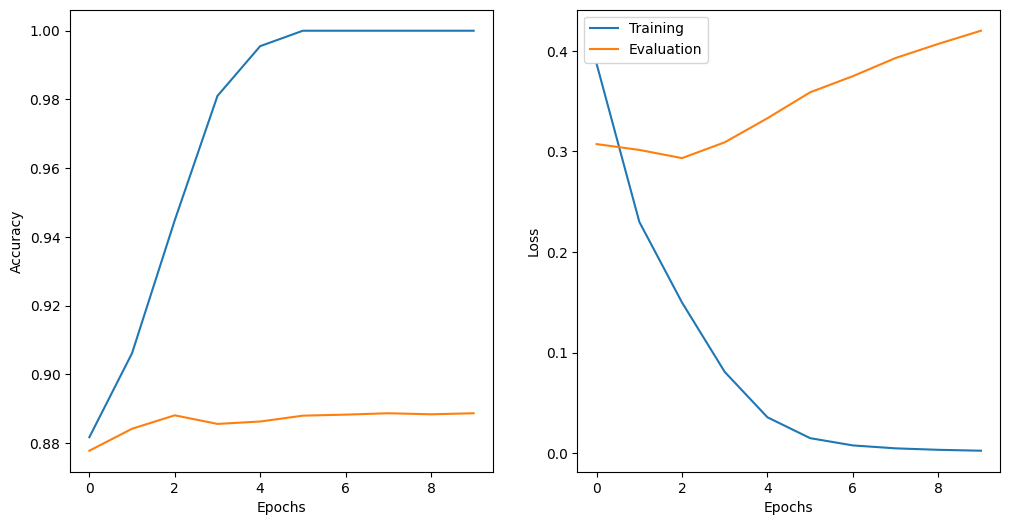

In [177]:
def plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses):
    epochs = list(range(num_epochs))
    fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
    axs[0].plot(epochs, train_accs, label = "Training")
    axs[0].plot(epochs, eval_accs, label = "Evaluation")
    axs[1].plot(epochs, train_losses, label = "Training")
    axs[1].plot(epochs, eval_losses, label = "Evaluation")
    axs[0].set_xlabel("Epochs")
    axs[1].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_ylabel("Loss")
    plt.legend()

plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses)

###**3.9. Evaluation & Prediction**

In [178]:
test_dataset = prepare_dataset(test_df)
test_dataset = to_map_style_dataset(test_dataset)

In [179]:
test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch
)

In [180]:
test_acc, test_loss = evaluate(model, criterion, valid_dataloader)
test_acc, test_loss

(0.8887, 0.4200348587164396)